After 1000 iterations b = 0.08893651996682016, m = 1.4777440851889796
the coefficient of determination is 0.747855


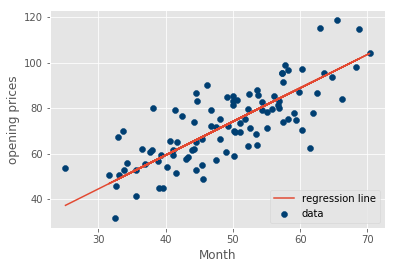

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
style.use('ggplot')


# y = mx + b
# m is slope, b is y-intercept

def coefficient_of_determination(Y,Yp):
    temp=0.0
    temp=sum(Y[i] for i in range(len(Y)))
    temp/=(len(Y))
    meanY=temp
    SSR=0
    for i in range(len(Y)):
        SSR+=((Yp[i]-meanY)*(Yp[i]-meanY))
    SSTO=0
    for i in range(len(Y)):
        SSTO+=((Y[i]-meanY)*(Y[i]-meanY))
    return (SSR/SSTO)
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    xs=[points[i,0] for i in range(len(points)) ]
    X=array(xs,dtype=float64)
    ys=[points[i,1] for i in range(len(points)) ]
    Y=array(ys,dtype=float64)
    N = float(len(points))
    b_gradient=sum(-(2/N) * (Y[i] - ((m_current * X[i]) + b_current)) for i in range(len(X)))
    m_gradient=sum(-(2/N) * X[i] * (Y[i] - ((m_current * X[i]) + b_current)) for i in range(len(X)))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations =1000
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}".format(num_iterations, b, m))
    x = [points[i,0] for i in range(0, len(points))]
    y = [points[i,1] for i in range(0, len(points))]
    X=array(x,dtype=float64)
    Y=array(y,dtype=float64)
    regression_line = [(m*x)+b for x in X]
    regressionline=array(regression_line,dtype=float64)
    r_squared = coefficient_of_determination(Y,regressionline)
    print("the coefficient of determination is %f" %r_squared)
    plt.scatter(X,Y,color='#003F72',label='data')
    plt.plot(X, regressionline, label='regression line')
    plt.legend(loc=4)
    plt.ylabel('opening prices')
    plt.xlabel('Month')
    plt.show()

if __name__ == '__main__':
    run()